In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Step 1: Load the dataset and handle mixed types warning
file_path = 'train.csv'  # Adjust the file path as necessary

# Load the dataset with low_memory=False to avoid dtype warnings
data = pd.read_csv(file_path, low_memory=False)

# Display basic information about the dataset
print("Initial Data Overview:")
print(data.info())
print("\nFirst few rows of the dataset:")
print(data.head())

# Step 2: Inspect the column with mixed types
# For example, if the problematic column is 'Customers'
print("\nChecking data types and inspecting column 'Customers':")
print(data.dtypes)

# Inspect the 'Customers' column
print("\nFirst few rows of the 'Customers' column:")
print(data['Customers'].head(20))

# Step 3: Convert 'Customers' column to string if necessary
data['Customers'] = data['Customers'].astype('str')

# Step 4: Data Cleaning

## Handle missing values
print("\nMissing values before cleaning:")
print(data.isnull().sum())

# Fill missing values for numerical columns with the median
numerical_cols = data.select_dtypes(include=[np.number]).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

# Fill missing values for categorical columns with the mode
categorical_cols = data.select_dtypes(include=[object]).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

print("\nMissing values after cleaning:")
print(data.isnull().sum())

## Remove duplicates
data = data.drop_duplicates()

# Convert date column to datetime format (if applicable)
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])

    # Set the date column as the index and sort
    data = data.set_index('Date').sort_index()

# Handling outliers for a specific column (e.g., 'Sales')
def cap_outliers(df, column_name):
    """Cap outliers for a specified column."""
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[column_name] = np.clip(df[column_name], lower_bound, upper_bound)

# Example for capping outliers in 'Sales' column
if 'Sales' in data.columns:
    cap_outliers(data, 'Sales')

# Ensure no negative values in 'Sales' column (if applicable)
if 'Sales' in data.columns:
    data = data[data['Sales'] >= 0]

# Display cleaned data overview
print("\nCleaned Data Overview:")
print(data.info())
print("\nFirst few rows of the cleaned dataset:")
print(data.head())

# Save the cleaned dataset to a new CSV file
cleaned_file_path = 'cleaned_train.csv'  # Adjust the file path as necessary
data.to_csv(cleaned_file_path)

print(f"\nCleaned data saved to {cleaned_file_path}")


Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
None

First few rows of the dataset:
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314       

In [8]:
import pandas as pd

# Load the cleaned dataset
file_path = 'cleaned_train.csv'  # Adjust the file path as necessary
data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date', low_memory=False)

# Check for duplicate index labels
duplicate_dates = data.index[data.index.duplicated()].unique()
print(f"Duplicate dates found: {duplicate_dates}")


Duplicate dates found: DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2015-07-22', '2015-07-23', '2015-07-24', '2015-07-25',
               '2015-07-26', '2015-07-27', '2015-07-28', '2015-07-29',
               '2015-07-30', '2015-07-31'],
              dtype='datetime64[ns]', name='Date', length=942, freq=None)


In [11]:
# Drop duplicate rows, keeping the first occurrence
data = data[~data.index.duplicated(keep='first')]

# Ensure the index is a DatetimeIndex and set frequency if needed
data.index = pd.to_datetime(data.index)
data = data.asfreq('D')  # Set frequency to daily if you have daily data

# Proceed with your EDA
print("Data Overview after removing duplicates:")
print(data.info())
print("\nFirst few rows after removing duplicates:")
print(data.head())


Data Overview after removing duplicates:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1 entries, 1970-01-01 to 1970-01-01
Freq: D
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1 non-null      object 
 1   Forecast Sales  1 non-null      float64
dtypes: float64(1), object(1)
memory usage: 24.0+ bytes
None

First few rows after removing duplicates:
                  Date  Forecast Sales
1970-01-01  2015-08-01     6219.516792


Data Overview after handling duplicates:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 942 entries, 2013-01-01 to 2015-07-31
Freq: D
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store          942 non-null    int64  
 1   DayOfWeek      942 non-null    int64  
 2   Sales          942 non-null    float64
 3   Customers      942 non-null    int64  
 4   Open           942 non-null    int64  
 5   Promo          942 non-null    int64  
 6   StateHoliday   915 non-null    float64
 7   SchoolHoliday  942 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 66.2 KB
None

First few rows after handling duplicates:
            Store  DayOfWeek   Sales  Customers  Open  Promo  StateHoliday  \
Date                                                                         
2013-01-01   1115          2     0.0          0     0      0           NaN   
2013-01-02    371          3  7374.0        606     1  

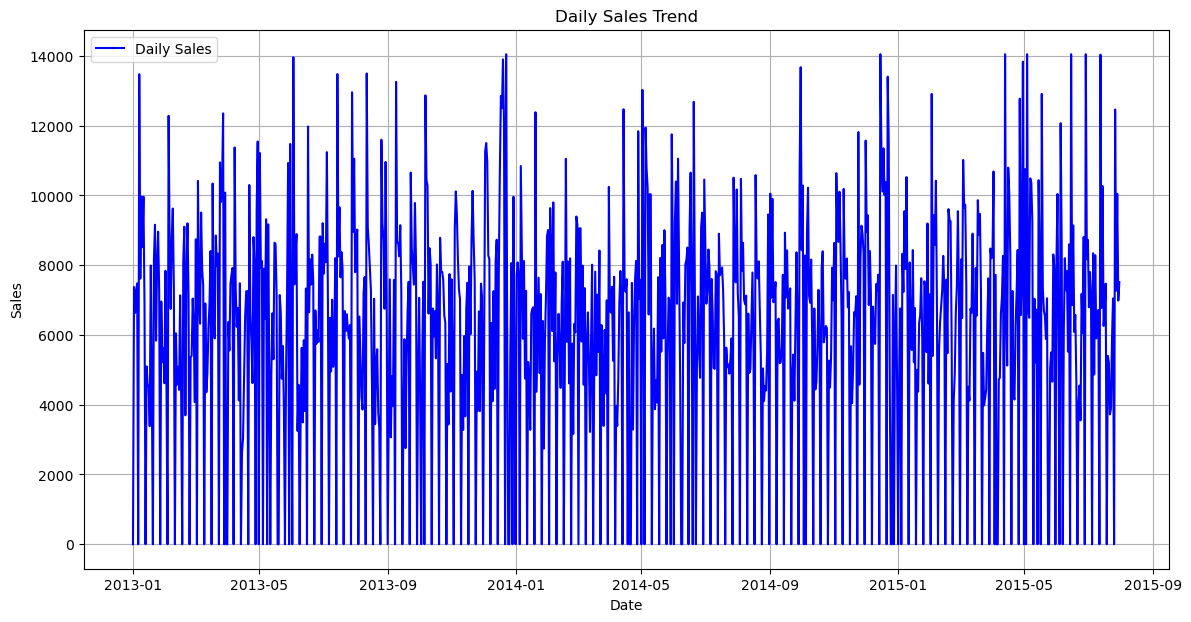

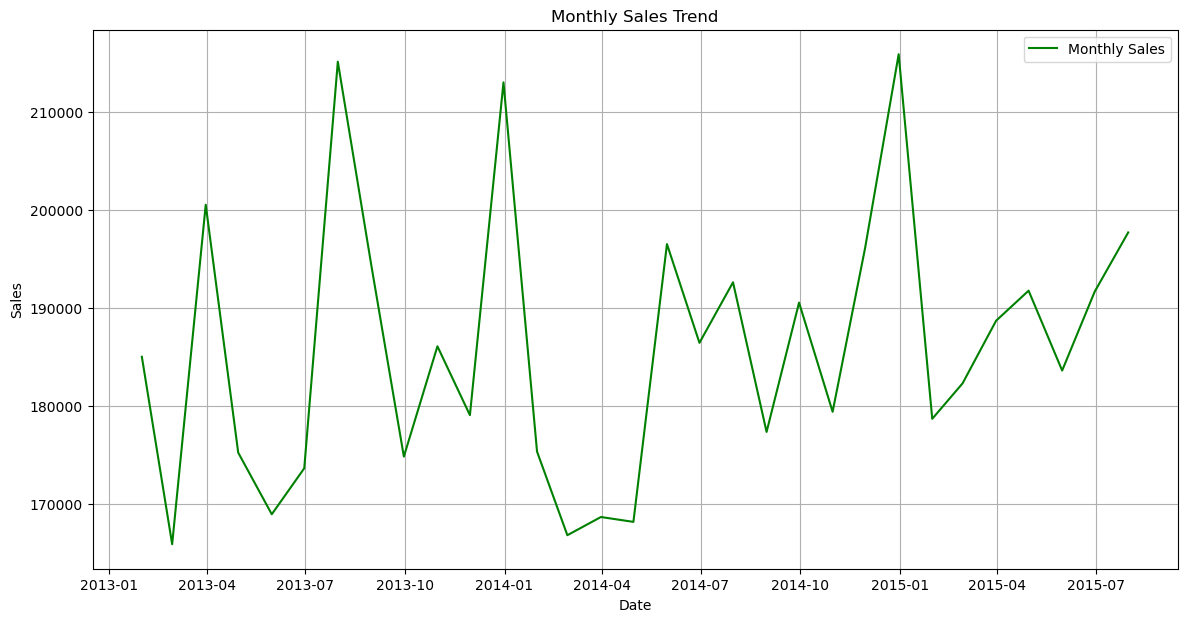

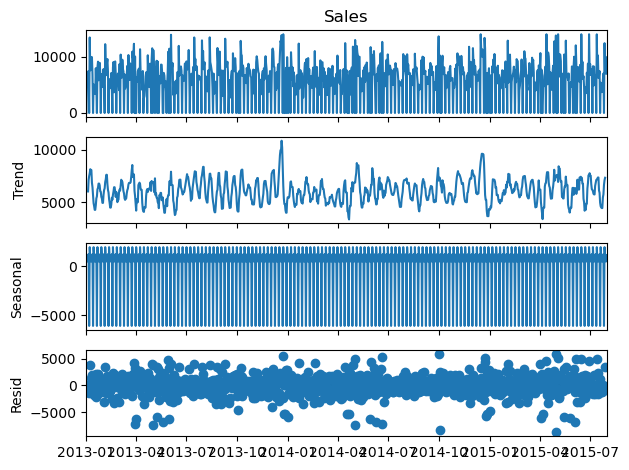

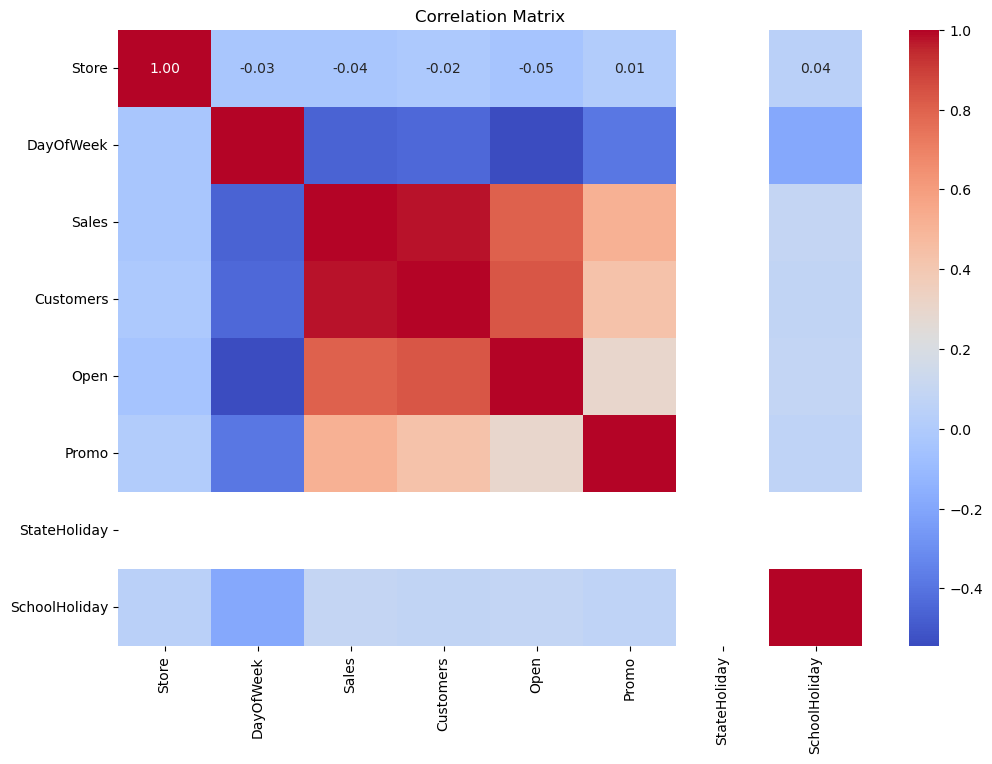

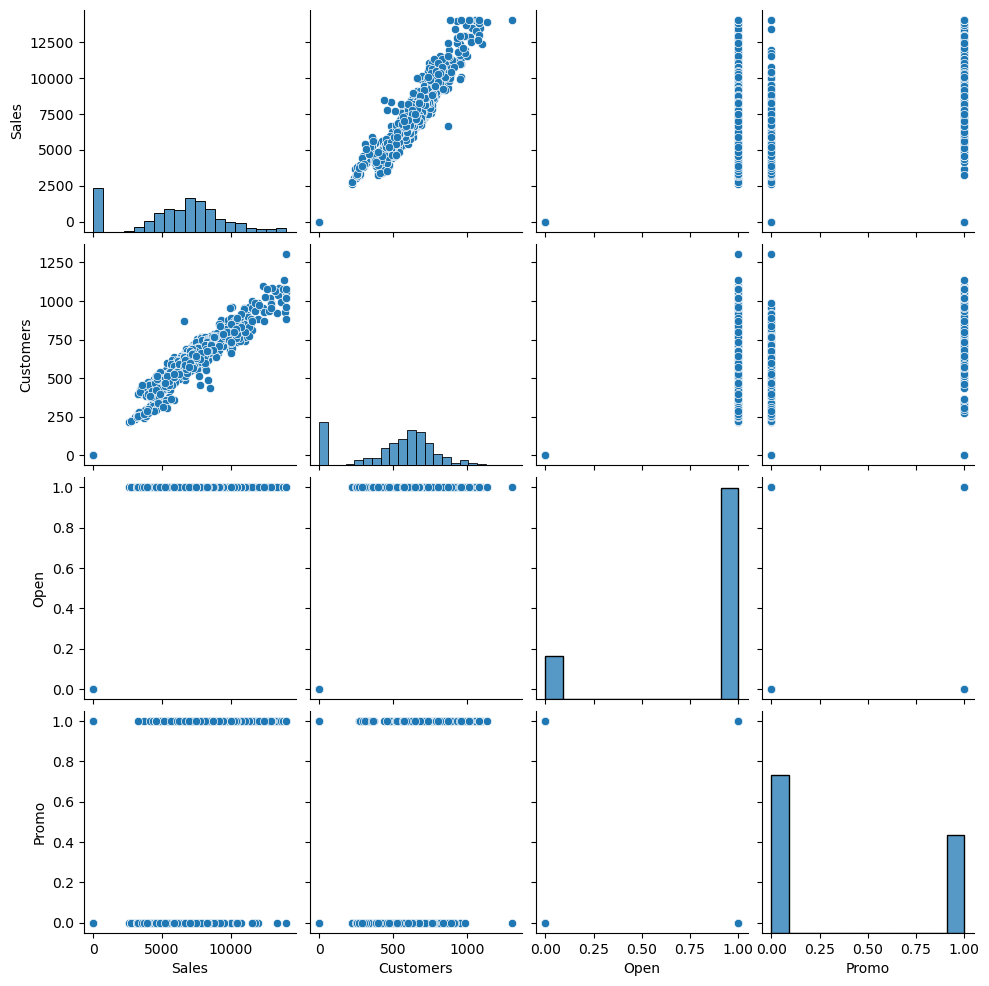

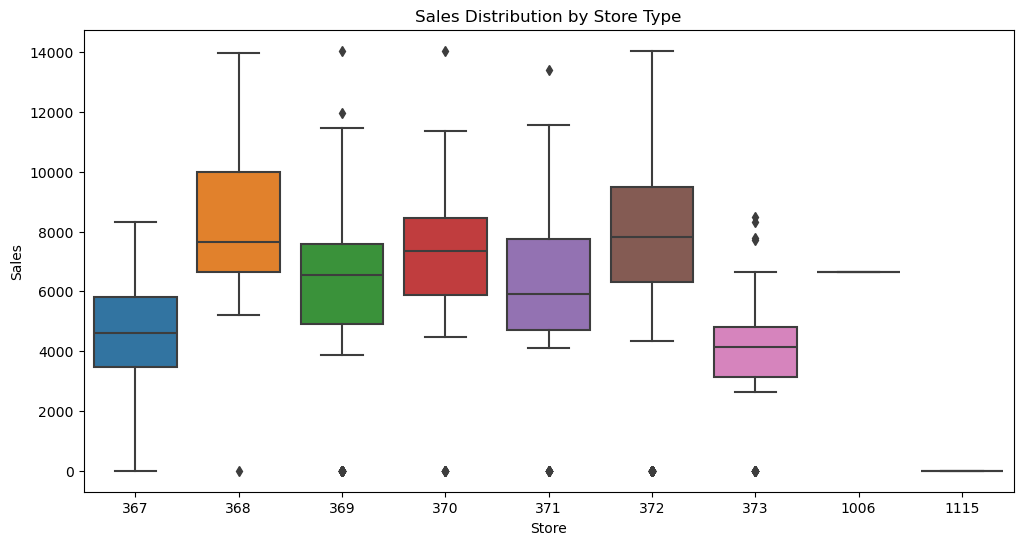

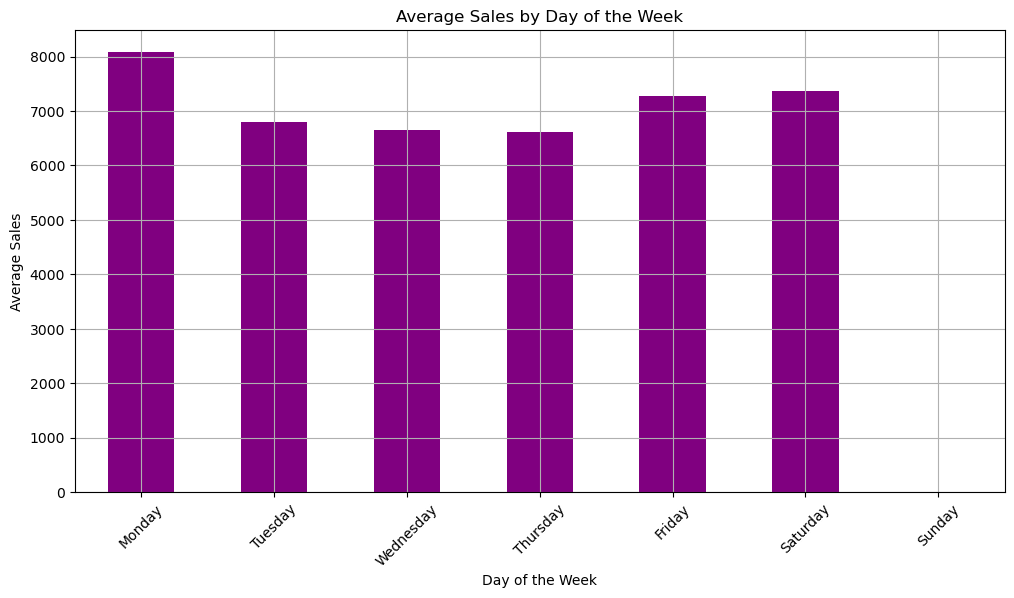

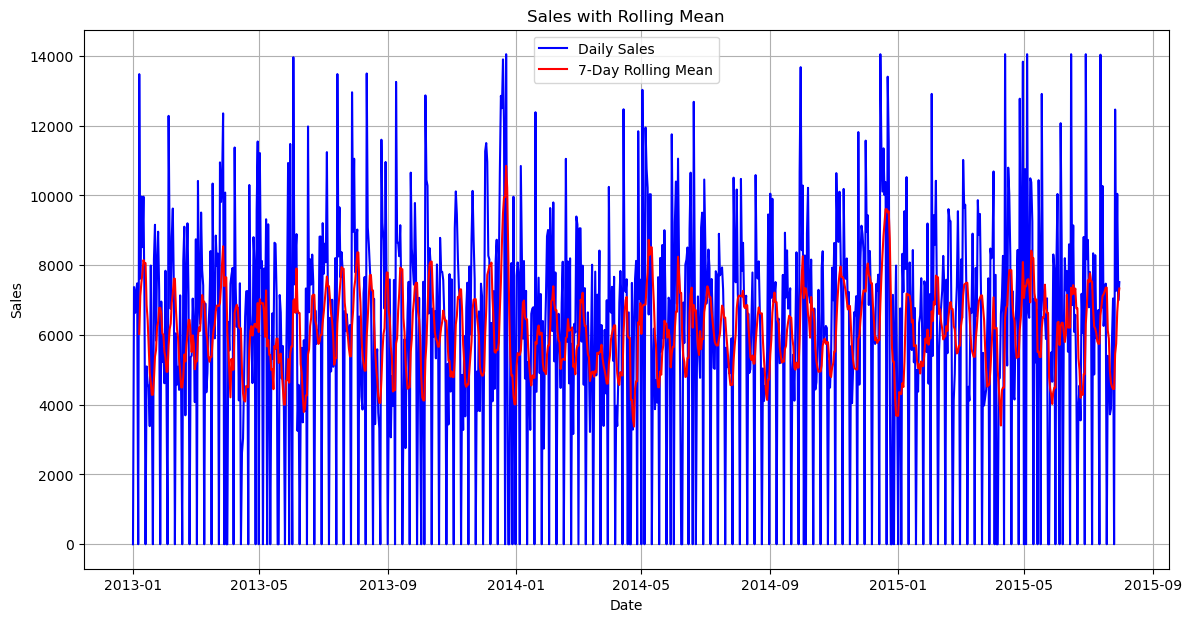

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
file_path = 'cleaned_train.csv'  # Adjust the file path as necessary
data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date', low_memory=False)

# Convert columns to numeric if necessary
data = data.apply(pd.to_numeric, errors='coerce')

# Handle duplicate indices
data = data[~data.index.duplicated(keep='first')]

# Ensure the index is a DatetimeIndex and set frequency if needed
data.index = pd.to_datetime(data.index)
data = data.asfreq('D')  # Set frequency to daily

# Display basic information and first few rows
print("Data Overview after handling duplicates:")
print(data.info())
print("\nFirst few rows after handling duplicates:")
print(data.head())

# 1. Exploratory Data Analysis (EDA)

## 1.1 Sales Trends Analysis
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Sales'], label='Daily Sales', color='blue')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

## 1.2 Seasonality Analysis
monthly_sales = data['Sales'].resample('M').sum()
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales.index, monthly_sales, label='Monthly Sales', color='green')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

result = seasonal_decompose(data['Sales'].dropna(), model='additive')
result.plot()
plt.show()

## 1.3 Correlation Analysis
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

selected_features = ['Sales', 'Customers', 'Open', 'Promo']  # Adjust based on your dataset
sns.pairplot(data[selected_features])
plt.show()

## 1.4 Visualize Sales by Store Attributes
plt.figure(figsize=(12, 6))
sns.boxplot(x='Store', y='Sales', data=data)
plt.title('Sales Distribution by Store Type')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.show()

# Add a column for the day of the week
data['DayOfWeek'] = data.index.day_name()

# Define the order of days from Monday to Sunday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate average sales by day of the week and reorder according to day_order
avg_sales_by_day = data.groupby('DayOfWeek')['Sales'].mean()
avg_sales_by_day = avg_sales_by_day.reindex(day_order)  # Reorder the days

# Plot the data
plt.figure(figsize=(12, 6))
avg_sales_by_day.plot(kind='bar', color='purple')
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## 1.5 Identifying Anomalies
rolling_mean = data['Sales'].rolling(window=7).mean()
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Sales'], label='Daily Sales', color='blue')
plt.plot(data.index, rolling_mean, color='red', label='7-Day Rolling Mean')
plt.title('Sales with Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# 2. Feature Engineering

## 2.1 Lag Features
data['Sales_Lag1'] = data['Sales'].shift(1)
data['Sales_Lag7'] = data['Sales'].shift(7)

## 2.2 Rolling Statistics
data['Sales_RollingMean7'] = data['Sales'].rolling(window=7).mean()
data['Sales_RollingStd7'] = data['Sales'].rolling(window=7).std()

## 2.3 Time Features
data['DayOfWeek'] = data.index.dayofweek
data['Month'] = data.index.month
data['IsHoliday'] = data['StateHoliday'].apply(lambda x: 1 if x != '0' else 0)

# Drop rows with NaN values created by lag and rolling features
data.dropna(inplace=True)

# 3. Model Development and Optimization

## 3.1 Split Data
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

## 3.2 ARIMA Model
model = ARIMA(train_data['Sales'], order=(5,1,0))  # Adjust the order based on your data
model_fit = model.fit()

## 3.3 Forecast
forecast = model_fit.forecast(steps=len(test_data))[0]

## 3.4 Evaluation
test_data['Forecast'] = forecast
mse = mean_squared_error(test_data['Sales'], test_data['Forecast'])
r2 = r2_score(test_data['Sales'], test_data['Forecast'])

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the forecast against actual sales
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data['Sales'], label='Training Sales', color='blue')
plt.plot(test_data.index, test_data['Sales'], label='Actual Sales', color='green')
plt.plot(test_data.index, test_data['Forecast'], label='Forecasted Sales', color='red')
plt.title('Sales Forecast vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

print("Project completed. Please review the results and prepare documentation and presentation.")


In [ ]:
#Shameer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")

# Load the preprocessed train data
train_data = pd.read_csv('processed_train_data.csv', parse_dates=['Date'], index_col='Date')

# 1. School and State Holidays
plt.figure(figsize=(10, 6))
sns.countplot(x='SchoolHoliday', data=train_data)
plt.title('Count of School Holidays')
plt.xlabel('School Holiday')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='StateHoliday', data=train_data)
plt.title('Count of State Holidays')
plt.xlabel('State Holiday')
plt.ylabel('Count')
plt.show()

# 2. Seasonality
monthly_sales = train_data.groupby('Month')['Sales'].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

result = seasonal_decompose(train_data['Sales'], model='additive', period=365)
result.plot()
plt.show()

# 3. Locality
plt.figure(figsize=(12, 6))
sns.boxplot(x='StoreType', y='Sales', data=train_data)
plt.title('Sales Distribution by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Assortment', data=train_data)
plt.title('Count of Store Assortment Types')
plt.xlabel('Assortment Type')
plt.ylabel('Count')
plt.show()

# 4. Sales Over Time (6 weeks)
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data['Sales'], label='Daily Sales', color='blue')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# 5. Sales per Week - Average Sales per Week
weekly_sales = train_data['Sales'].resample('W').mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=weekly_sales.index, y=weekly_sales.values)
plt.title('Average Sales per Week')
plt.xlabel('Week')
plt.ylabel('Average Sales')
plt.grid(True)
plt.show()

# 6. Weekday Sales (Monday - Sunday)
avg_sales_by_day = train_data.groupby('DayOfWeek')['Sales'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_sales_by_day.index, y=avg_sales_by_day.values)
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.grid(True)
plt.show()

# 7. Sales per Day, Customers per Day, and Sales per Customers per Day
daily_sales = train_data.groupby('Date')['Sales'].sum()
plt.figure(figsize=(14, 7))
plt.plot(daily_sales.index, daily_sales.values, label='Sales per Day', color='blue')
plt.title('Sales per Day')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

daily_customers = train_data.groupby('Date')['Customers'].sum()
plt.figure(figsize=(14, 7))
plt.plot(daily_customers.index, daily_customers.values, label='Customers per Day', color='green')
plt.title('Customers per Day')
plt.xlabel('Date')
plt.ylabel('Customers')
plt.legend()
plt.grid(True)
plt.show()

train_data['SalesPerCustomer'] = train_data['Sales'] / train_data['Customers']
daily_sales_per_customer = train_data.groupby('Date')['SalesPerCustomer'].mean()
plt.figure(figsize=(14, 7))
plt.plot(daily_sales_per_customer.index, daily_sales_per_customer.values, label='Sales per Customers per Day', color='purple')
plt.title('Sales per Customers per Day')
plt.xlabel('Date')
plt.ylabel('Sales per Customers')
plt.legend()
plt.grid(True)
plt.show()




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
data_url = "https://raw.githubusercontent.com/infinadox/Sales-Data-Forecasting/main/rossmann-store-sales/processed_train_data.csv"
data = pd.read_csv(data_url)

# Ensure that only numeric columns are used for correlation
numeric_data = data.select_dtypes(include=[np.number])

# Display the first few rows of the dataset
print(data.head())

# 1. Sales Distribution
plt.figure(figsize=(10,6))
sns.histplot(data['Sales'], kde=True, bins=50)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# 2. Sales vs. Day of the Week
plt.figure(figsize=(10,6))
sns.boxplot(x='DayOfWeek', y='Sales', data=data)
plt.title('Sales vs. Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Sales')
plt.show()

# 3. Sales Trends Over Time
plt.figure(figsize=(14,7))
sns.lineplot(x='Date', y='Sales', data=data)
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

# 4. Sales vs. Store Type
plt.figure(figsize=(10,6))
sns.boxplot(x='StoreType', y='Sales', data=data)
plt.title('Sales vs. Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.show()

# 5. Sales vs. Promo
plt.figure(figsize=(10,6))
sns.boxplot(x='Promo', y='Sales', data=data)
plt.title('Sales vs. Promo')
plt.xlabel('Promo')
plt.ylabel('Sales')
plt.show()

# 6. Sales vs. State Holiday
plt.figure(figsize=(10,6))
sns.boxplot(x='StateHoliday', y='Sales', data=data)
plt.title('Sales vs. State Holiday')
plt.xlabel('State Holiday')
plt.ylabel('Sales')
plt.show()

# 7. Sales vs. Competition Distance
plt.figure(figsize=(10,6))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=data)
plt.title('Sales vs. Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Sales')
plt.show()

# 8. Sales vs. Customers
plt.figure(figsize=(10,6))
sns.scatterplot(x='Customers', y='Sales', data=data)
plt.title('Sales vs. Customers')
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

# 9. Correlation Heatmap
plt.figure(figsize=(12,8))
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()